Design a low-pass digital FIR filter whose sampling frequency is 1000 Hz with a
cutoff frequency of 350 Hz, employing a Hamming window of length N = 7. Plot its
magnitude and phase responses. Generate a random composite signal of 200 Hz and
450 Hz with a sampling frequency is 1000 Hz. Use this designed filter to process the
generated signal.

In [167]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
fs = 1000  # Sampling frequency
fc = 350  # Cutoff frequency
N = 7  # Filter length

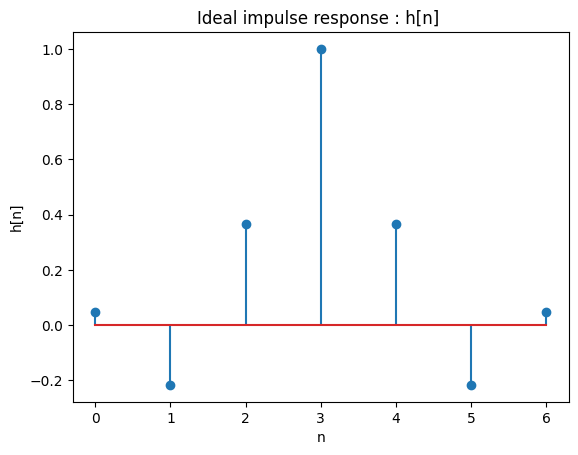

In [168]:
# Design the filter coefficients
n = np.arange(N)
h_ideal = np.sinc(2 * fc * (n - (N - 1) / 2) / fs) # Ideal impulse response
plt.stem(h_ideal)
plt.title('Ideal impulse response : h[n] ')
plt.xlabel('n')
plt.ylabel('h[n]')
plt.show()
#show values on plot

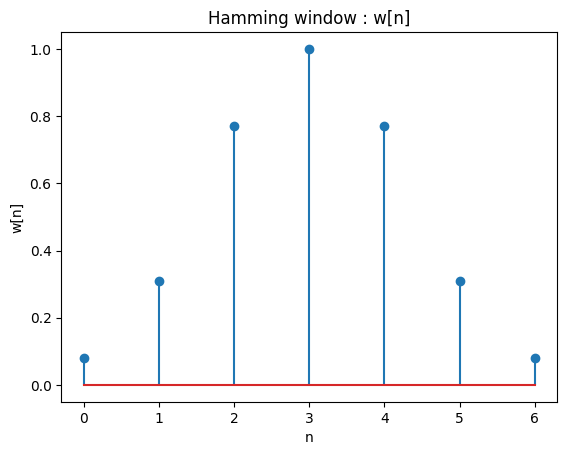

hamm :  [0.08 0.31 0.77 1.   0.77 0.31 0.08]


In [169]:
# Hamming Window
w = 0.54 - 0.46 * np.cos(2 * np.pi * n / (N - 1))
plt.stem(w)
plt.title('Hamming window : w[n]')
plt.xlabel('n')
plt.ylabel('w[n]')
plt.show()
print("hamm : ",w)

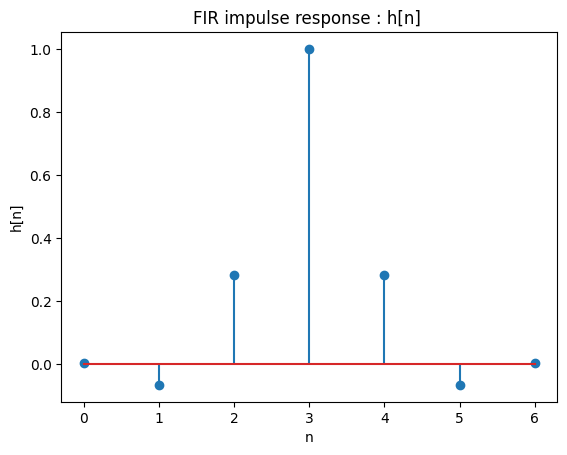

Desired impulse response :  [ 0.00374717 -0.06703322  0.28326992  1.          0.28326992 -0.06703322
  0.00374717]


In [170]:
# FIR Impulse response
h = h_ideal * w
plt.stem(h)
plt.title('FIR impulse response : h[n] ')
plt.xlabel('n')
plt.ylabel('h[n]')
plt.show()
print("Desired impulse response : ",h)

In [171]:
print("Coefficients : ",np.round(h,4))

Coefficients :  [ 0.0037 -0.067   0.2833  1.      0.2833 -0.067   0.0037]


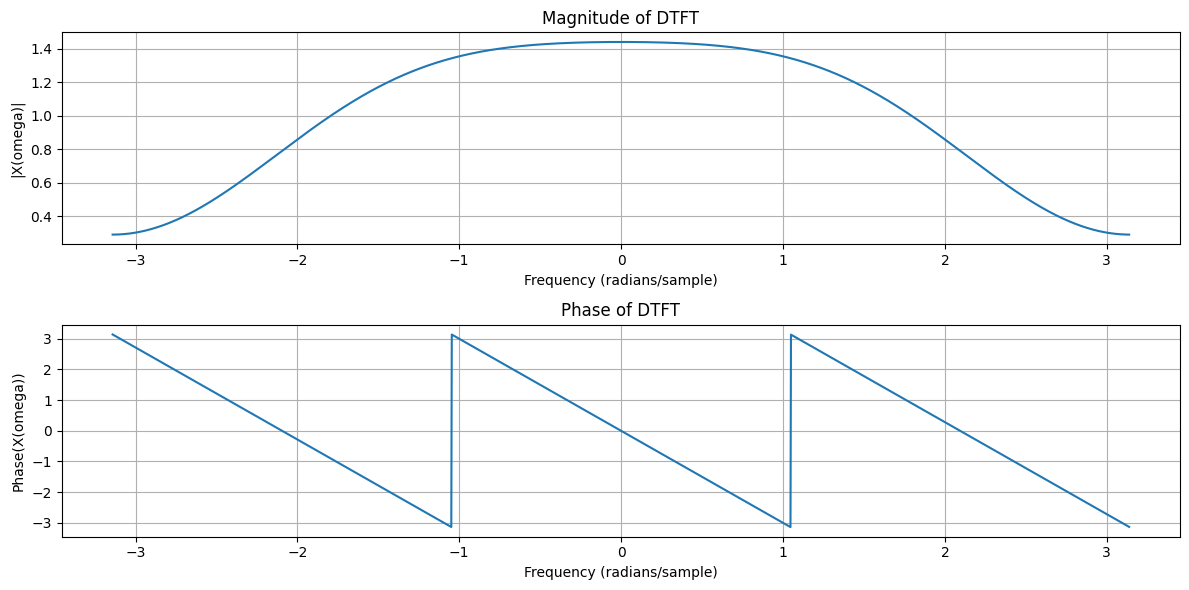

In [172]:
# Frequency Response
def dtft(x, n, w):
    X = np.zeros_like(w, dtype=complex)
    for k, omega in enumerate(w):
        X[k] = np.sum(x * np.exp(-1j * omega * n))
    return X

# Define the range of frequencies for DTFT
omega = np.linspace(-np.pi, np.pi, num=2048, endpoint=False)  # Frequency range

# Compute DTFT
H = dtft(h, n, omega)

# Plot the magnitude and phase of the DTFT
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(omega, np.abs(H))
plt.title('Magnitude of DTFT')
plt.xlabel('Frequency (radians/sample)')
plt.ylabel('|X(omega)|')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(omega, np.angle(H))
plt.title('Phase of DTFT')
plt.xlabel('Frequency (radians/sample)')
plt.ylabel('Phase(X(omega))')
plt.grid(True)

plt.tight_layout()
plt.show()


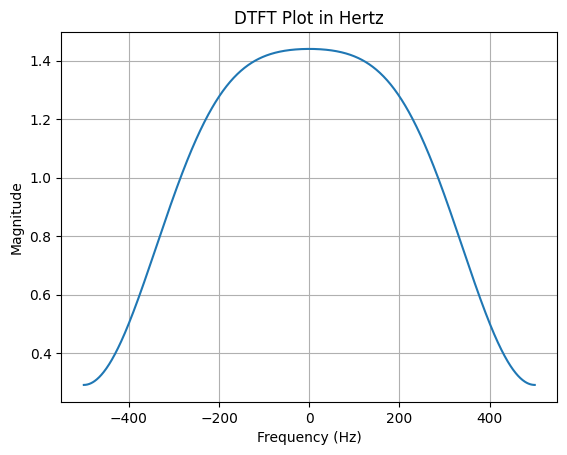

In [185]:
dtft_values =H
freq_range_rads = np.linspace(-np.pi, np.pi, len(dtft_values))

# Sampling frequency (in Hz)
sampling_freq = 1000  # Replace this with your sampling frequency

# Calculate frequency axis in Hertz
freq_range_hz = freq_range_rads * (sampling_freq / (2 * np.pi))

# Plot DTFT in Hertz
plt.figure()
plt.plot(freq_range_hz, np.abs(dtft_values))
plt.title('DTFT Plot in Hertz')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

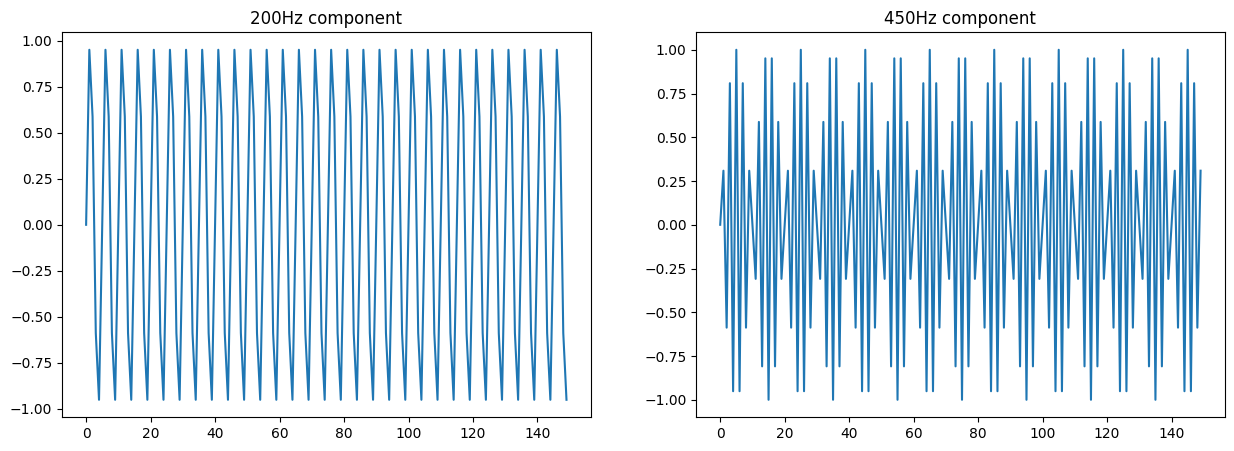

In [174]:
# Generate the composite signal
n = np.arange(150)
w200 = 2 * np.pi * 200 / fs
w400 = 2 * np.pi * 450 / fs
signal_200Hz = np.sin(w200 * n)  # 200 Hz component
signal_450Hz = np.sin(w400 * n)  # 450 Hz component
composite_signal = signal_200Hz + signal_450Hz  # Composite signal
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(signal_200Hz)
plt.title("200Hz component")
plt.subplot(1,2,2)
# plt.figure(figsize=(15,5))
plt.plot(signal_450Hz)
plt.title("450Hz component")
plt.show()

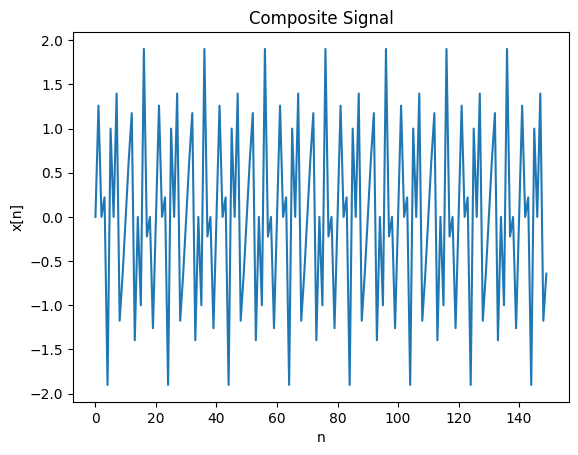

In [175]:
plt.plot(composite_signal)
plt.title("Composite Signal")
plt.xlabel("n")
plt.ylabel("x[n]")
plt.show()

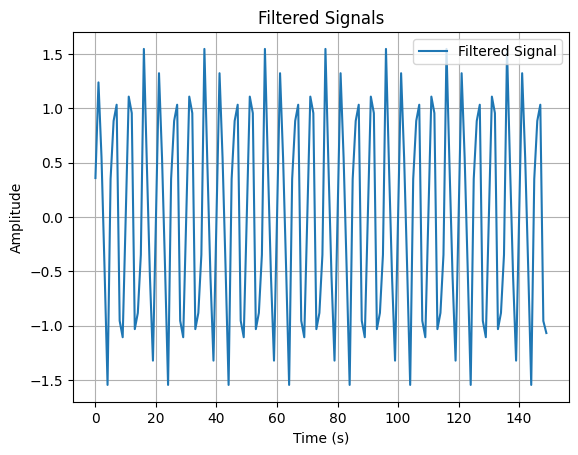

In [176]:
# Apply filter to the composite signal
filtered_signal = np.convolve(composite_signal, h, mode='same')
# Plot original and filtered signals
#plt.figure(figsize=(15,5))
#plt.plot(t, composite_signal, label='Original Signal')
plt.plot(filtered_signal, label='Filtered Signal')
plt.title('Filtered Signals')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()

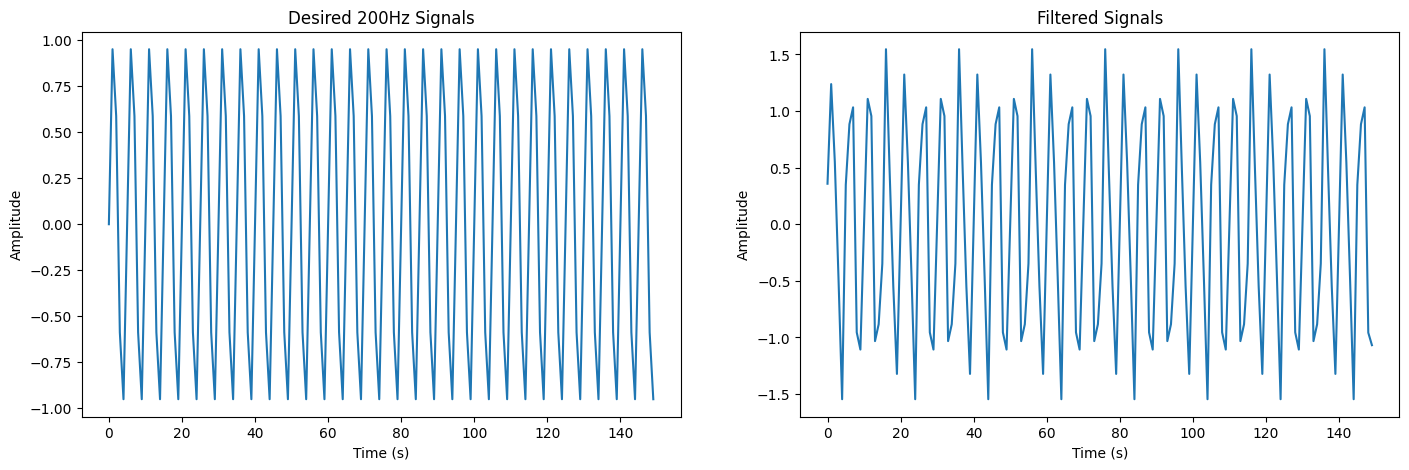

In [177]:
# Plot original and filtered signals
plt.figure(figsize=(17,5))
plt.subplot(1,2,1)
plt.plot(signal_200Hz, label='Original Signal')
plt.title('Desired 200Hz Signals')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(1,2,2)
plt.plot(filtered_signal, label='Filtered Signal')
plt.title('Filtered Signals')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

In [178]:
def dtft(x, omega, N):
    X = np.zeros_like(omega, dtype=np.complex128)
    for k in range(len(omega)):
        X[k] = np.sum(x * np.exp(-1j * omega[k] * np.arange(N)))
    return X

# Angular frequencies for DTFT
omega = np.linspace(-np.pi, np.pi, 1000)

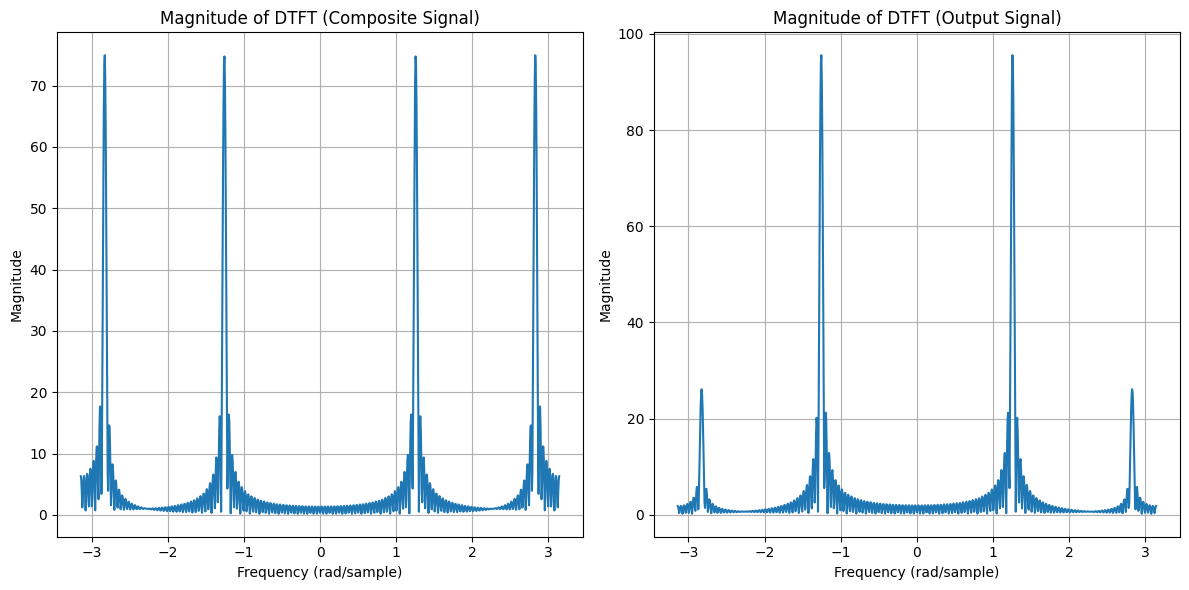

In [179]:
composite_signal = signal_200Hz + signal_450Hz
# Compute DTFT
X = dtft(composite_signal, omega, len(composite_signal))
#input_signal = dtft(composite_signal,omega,len(composite_signal))
H = dtft(h,omega,len(h))
output_signal = X * H

# Plot both signals in a single figure with subplots
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
plt.subplot(1, 2, 1)  # 1 row, 2 columns, subplot 1
plt.plot(omega, np.abs(X))
plt.title('Magnitude of DTFT (Composite Signal)')
plt.xlabel('Frequency (rad/sample)')
plt.ylabel('Magnitude')
plt.grid(True)

plt.subplot(1, 2, 2)  # 1 row, 2 columns, subplot 2
plt.plot(omega, np.abs(output_signal))
plt.title('Magnitude of DTFT (Output Signal)')
plt.xlabel('Frequency (rad/sample)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.tight_layout()  # Adjust subplot parameters to give specified padding
plt.show()

In [186]:
#using Built in for comparison
from scipy.signal import firwin, freqz

# Filter parameters
taps = 7
cutoff_freq = fc # Hz

# Design FIR filter using scipy.signal.firwin
fir_coeff = firwin(taps, cutoff_freq,window='hamming', fs=fs)
print(fir_coeff)

# Compute frequency response
freq, response = freqz(fir_coeff, 1, worN=1024, fs=fs)

# Extract magnitude and phase response
mag_response = np.abs(response)
phase_response = np.angle(response)

[ 0.00260226 -0.04655189  0.19671963  0.69446001  0.19671963 -0.04655189
  0.00260226]


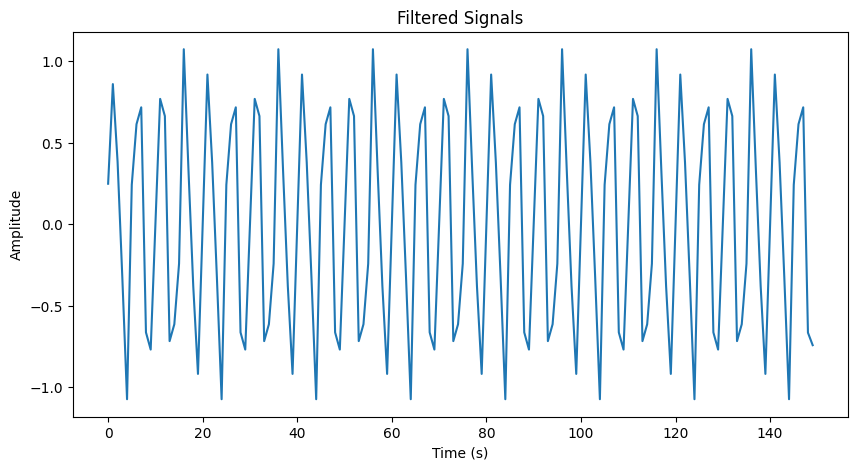

In [181]:
# Apply filter to the composite signal
filtered_signal = np.convolve(composite_signal, fir_coeff, mode='same')
# Plot original and filtered signals
plt.figure(figsize=(10,5))
plt.plot(filtered_signal, label='Filtered Signal')
plt.title('Filtered Signals')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

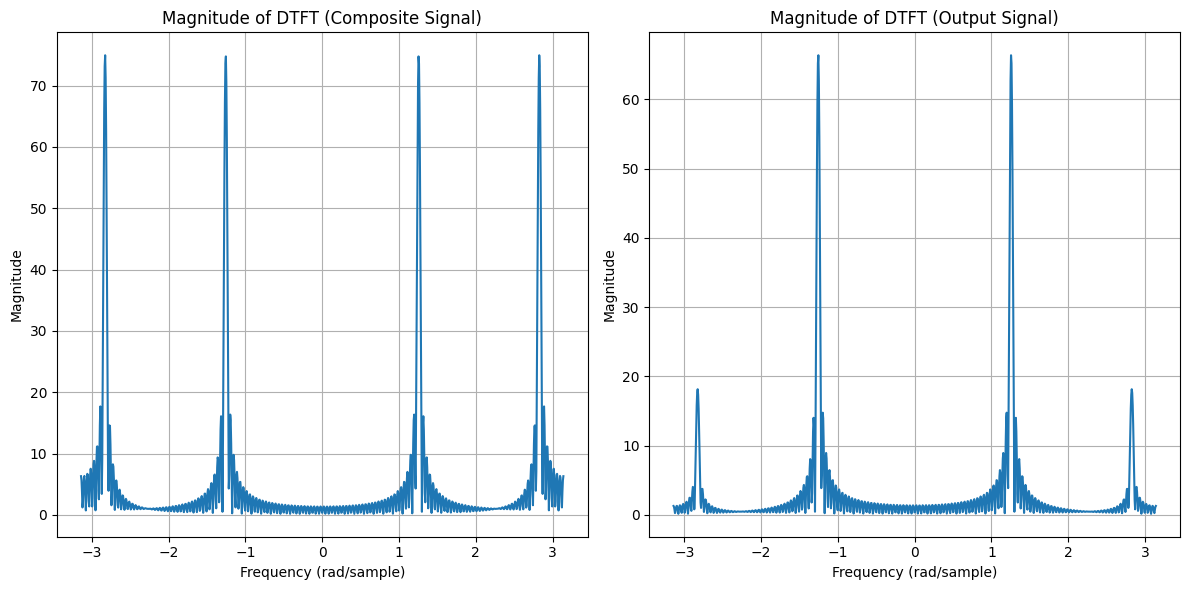

In [182]:
H2 = dtft(fir_coeff,omega,len(h))
output_signal2 = X * H2

# Plot both signals in a single figure with subplots
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
plt.subplot(1, 2, 1)  # 1 row, 2 columns, subplot 1
plt.plot(omega, np.abs(X))
plt.title('Magnitude of DTFT (Composite Signal)')
plt.xlabel('Frequency (rad/sample)')
plt.ylabel('Magnitude')
plt.grid(True)

plt.subplot(1, 2, 2)  # 1 row, 2 columns, subplot 2
plt.plot(omega, np.abs(output_signal2))
plt.title('Magnitude of DTFT (Output Signal)')
plt.xlabel('Frequency (rad/sample)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.tight_layout()  # Adjust subplot parameters to give specified padding
plt.show()

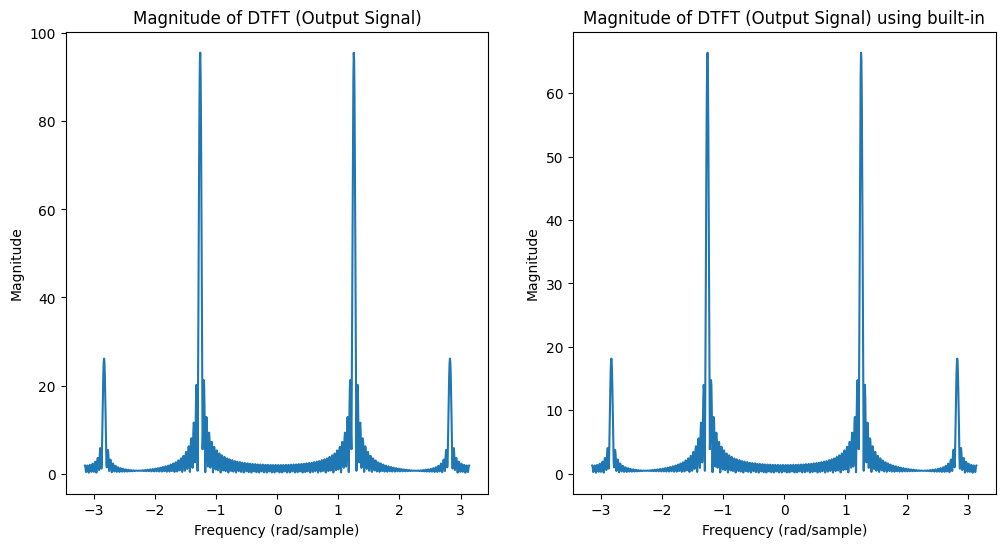

In [183]:
#Comparison:
# Plot both signals in a single figure with subplots
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
plt.subplot(1, 2, 1)  # 1 row, 2 columns, subplot 1
plt.plot(omega, np.abs(output_signal))
plt.title('Magnitude of DTFT (Output Signal)')
plt.xlabel('Frequency (rad/sample)')
plt.ylabel('Magnitude')
#plt.grid(True)

plt.subplot(1, 2, 2)  # 1 row, 2 columns, subplot 2
plt.plot(omega, np.abs(output_signal2))
plt.title('Magnitude of DTFT (Output Signal) using built-in')
plt.xlabel('Frequency (rad/sample)')
plt.ylabel('Magnitude')
#plt.tight_layout()  # Adjust subplot parameters to give specified padding
plt.show()